In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [19]:
print(n_block[1])
print(type(n_block))
print(type(n_block[1]))

print('size')
print(size[1])
print(type(size))
print(type(size[-1]))
print('ntx')
print(ntx[1])
print(type(ntx))
print(type(ntx[1]))
print('bits')
print(bits[1])
print(type(bits))
print(type(bits[1]))
print('chainwork')
print(chainwork[1])
print(type(chainwork))
print(type(chainwork[1]))
print('spri ')
print(strippedsize[1])
print(type(strippedsize))
print(type(strippedsize[1]))
print('weight ')
print(weight[1])
print(type(weight))
print(type(weight[1]))
print('total')
#print(total[1])
print(type(total))
#print(type(total[1]))






2.0
<class 'numpy.ndarray'>
<class 'numpy.float64'>
size
215.0
<class 'numpy.ndarray'>
<class 'numpy.float64'>
ntx
1.0
<class 'numpy.ndarray'>
<class 'numpy.float64'>
bits
1d00ffff
<class 'numpy.ndarray'>
<class 'numpy.str_'>
chainwork
0000000000000000000000000000000000000000000000000000000300030003
<class 'numpy.ndarray'>
<class 'numpy.str_'>
spri 
215.0
<class 'numpy.ndarray'>
<class 'numpy.float64'>
weight 
860.0
<class 'numpy.ndarray'>
<class 'numpy.float64'>
total
<class 'numpy.ndarray'>


In [21]:
print(total)
print(total/1000)
print((total/1000)/1000)
print(((total/1000)/1000)/1000)
print((((total/1000)/1000)/1000)/10000)


561977960077
561977960.077
561977.960077
561.9779600769999
0.056197796007699995


798268
798268


/home/richard/TRABAJO/BitcoinResearch/scripts/bra_pruebas/.venv/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


In [11]:
print(np.max(ntx))
print(np.argmax(ntx))
print(ntx[367852])
print(time_b[5])
print(len(time_b))
print(len(n_block))
print(type(time_b))

12239.0
367852
12239.0
2009-01-09 03:29:49
798268
798268
<class 'numpy.ndarray'>


In [18]:
#fechas_seg=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in time_b]

In [20]:
FECHAS = pd.to_datetime(time_b)
print(FECHAS[2]) 
print(type(FECHAS))
print(type(FECHAS[2]))

2009-01-09 03:02:53
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
print(type(fechas_seg))
print(type(fechas_seg[2]))
print(fechas_seg[2])
# TIEMPOS=np.array(fechas_seg)
# print(TIEMPOS[0])
# print(TIEMPOS[-1])
# print(type(TIEMPOS[0]))
# print(type(TIEMPOS))

<class 'list'>
<class 'datetime.datetime'>
2009-01-09 03:02:53


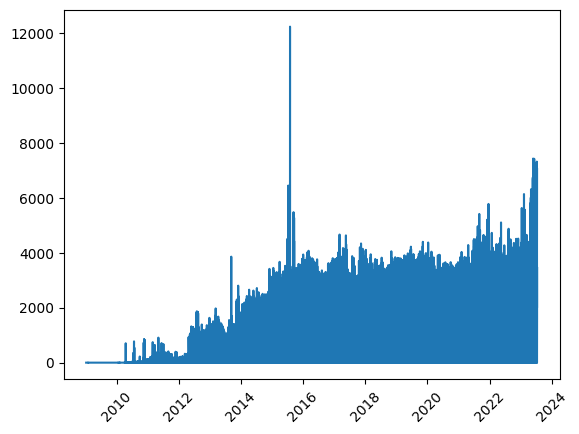

In [23]:
#fig,ax = plt.subplot()
plt.plot(FECHAS,ntx,label="transacciones  vs tiempo")
plt.xticks(rotation=45)
plt.show()

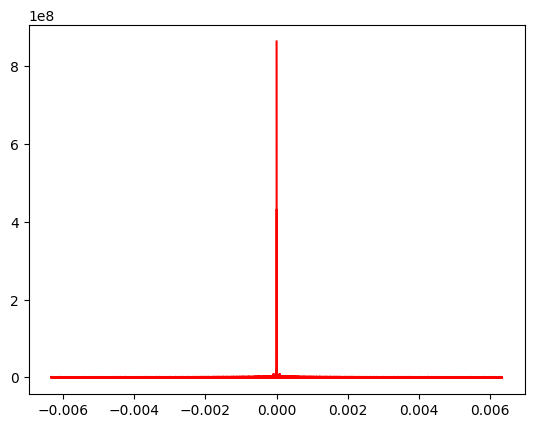

In [26]:
#=======TRANFORMADA SIN INTERPOLACION=======
tiempo_segundos=(FECHAS-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo
transformada=np.fft.fft(ntx)
#crea una variable que alverga la transformada a las transacciones
frecuencias=np.fft.fftfreq(len(ntx),d=(tiempo_segundos[1]-tiempo_segundos[0]))
#creamos las frecuencias fundamentales para la transformada
plt.plot(frecuencias, np.abs(transformada), color='r')


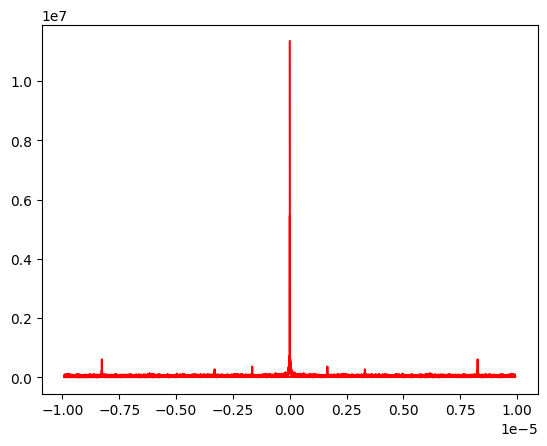

In [39]:
tiempo_segundos=(FECHAS-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],50400)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(50400))
plt.plot(frecuencias, np.abs(transformada), color='r')
#print(len(transformada))
#print(len(ntx_interpolado))
#print(tiempo_segundos[0]-tiempo_segundos[-1])
#print(tiempo_segundos[2])

In [ ]:
print(len(ntx))
print(len(n_block))

fft_ventas = np.fft.fft(ntx)

# Calcular las frecuencias correspondientes a las componentes de la FFT
frecuencias = np.fft.fftfreq(len(ntx), n_block[1] - n_block[0])
#plt.stem(frecuencias, np.abs(fft_ventas))
ax.scatter(fft_ventas,frecuencias ,label="numero de trans, por bloque", s=0.1,alpha=0.8)

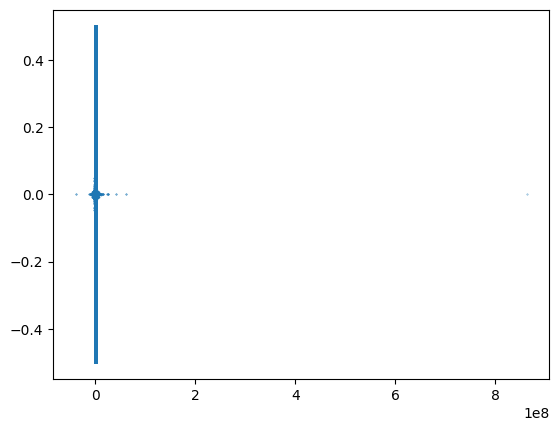

In [25]:
fig, ax = plt.subplots()
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]


#ax.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
#ax.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
#ax.scatter(n_block,ntx ,label="numero de trans, por bloque", s=0.1,alpha=0.8)
ax.scatter(fft_ventas,frecuencias ,label="numero de trans, por bloque", s=0.1,alpha=0.8)